In [1]:
import torch
from torch import Tensor, nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from optim import SGD, SGDMomentum, RMSProp, Adam # this is my optim, not torch's optim

In [ ]:
def test_optimizers():
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_data = datasets.MNIST(root="./", train=True, download=True, transform=transform)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

    class Net(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(28*28, 128)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(128, 10)

        def forward(self, x):
            x = x.view(x.size(0), -1)
            return self.fc2(self.relu(self.fc1(x)))

    losses = {}
    optim_classes = {
        "SGD": lambda params: SGD(list(params), learning_rate=0.1),
        "Momentum": lambda params: SGDMomentum(list(params), learning_rate=0.1, beta=0.9),
        "RMSProp": lambda params: RMSProp(list(params), learning_rate=0.001, beta2=0.99),
        "Adam": lambda params: Adam(list(params), learning_rate=0.001, beta1=0.9, beta2=0.999)
    }

    for name, opt_fn in optim_classes.items():
        print(f"\n=== Testing {name} ===")
        torch.manual_seed(0)
        model = Net()
        criterion = nn.CrossEntropyLoss()
        optimizer = opt_fn(model.parameters())

        losses[name] = []
        for epoch in range(10):
            total_loss = 0.0
            for images, labels in train_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)

                # backward
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

                total_loss += loss.item()

            avg_loss = total_loss / len(train_loader)
            losses[name].append(avg_loss)
            print(f"Epoch {epoch+1}: Loss = {avg_loss:.4f}")

    return losses


results = test_optimizers()
print("\nFinal losses:\n\t", results)


=== Testing SGD ===
Epoch 1: Loss = 0.3906
Epoch 2: Loss = 0.1767
Epoch 3: Loss = 0.1310
Epoch 4: Loss = 0.1060
Epoch 5: Loss = 0.0899
Epoch 6: Loss = 0.0794
Epoch 7: Loss = 0.0695
Epoch 8: Loss = 0.0627
Epoch 9: Loss = 0.0573
Epoch 10: Loss = 0.0501

=== Testing Momentum ===
Epoch 1: Loss = 0.3695
Epoch 2: Loss = 0.1818
Epoch 3: Loss = 0.1344
Epoch 4: Loss = 0.1077
Epoch 5: Loss = 0.0896
Epoch 6: Loss = 0.0791
Epoch 7: Loss = 0.0702
Epoch 8: Loss = 0.0618
Epoch 9: Loss = 0.0569
Epoch 10: Loss = 0.0519

=== Testing RMSProp ===
Epoch 1: Loss = 0.4029
Epoch 2: Loss = 0.2088
Epoch 3: Loss = 0.1512
Epoch 4: Loss = 0.1228
Epoch 5: Loss = 0.1053
Epoch 6: Loss = 0.0940
Epoch 7: Loss = 0.0833
Epoch 8: Loss = 0.0774
Epoch 9: Loss = 0.0711
Epoch 10: Loss = 0.0657

=== Testing Adam ===
Epoch 1: Loss = 0.3710
Epoch 2: Loss = 0.1918
Epoch 3: Loss = 0.1394
Epoch 4: Loss = 0.1115
Epoch 5: Loss = 0.0950
Epoch 6: Loss = 0.0836
Epoch 7: Loss = 0.0738
Epoch 8: Loss = 0.0681
Epoch 9: Loss = 0.0617
Epoch 

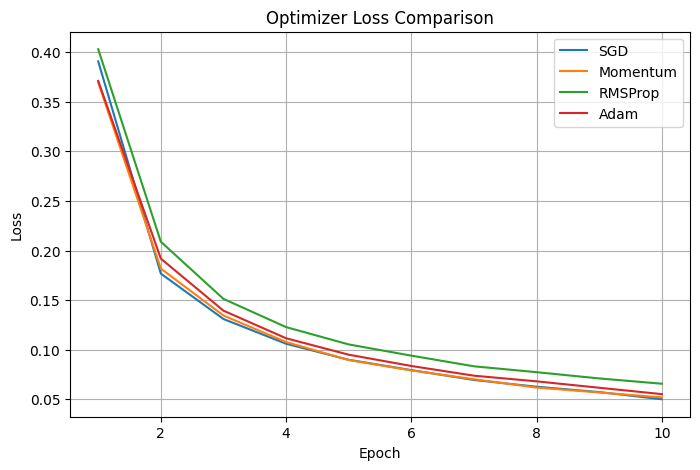

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
for name, loss_list in results.items():
    plt.plot(range(1, len(loss_list) + 1), loss_list, label=name)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Optimizer Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()